In [1]:
#!pip install transformers torch
#!pip install spacy
#!python -m spacy download en_core_web_sm


In [2]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Feedback data
feedbacks = [
    "I love the design and user interface, but the app crashes often, especially when I upload images.",
    "The customer service is too slow, it took three days to get a response to my query.",
    "I wish there were more payment options, as it's inconvenient to only use credit cards.",
    "The shipping took way too long. I ordered two weeks ago, and it just arrived.",
    "The product quality is great, but the prices are too high compared to other similar products.",
    "I love this Product",
    "I suggest this Product",
    "I stop recommending this product"
]

# Classify sentiment
sentiments = classifier(feedbacks)

for feedback, sentiment in zip(feedbacks, sentiments):
    print(f"Feedback: {feedback}\nSentiment: {sentiment}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. Th

Feedback: I love the design and user interface, but the app crashes often, especially when I upload images.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9991658926010132}

Feedback: The customer service is too slow, it took three days to get a response to my query.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9997193217277527}

Feedback: I wish there were more payment options, as it's inconvenient to only use credit cards.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9995099306106567}

Feedback: The shipping took way too long. I ordered two weeks ago, and it just arrived.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9992801547050476}

Feedback: The product quality is great, but the prices are too high compared to other similar products.
Sentiment: {'label': 'NEGATIVE', 'score': 0.9953789710998535}

Feedback: I love this Product
Sentiment: {'label': 'POSITIVE', 'score': 0.9998788833618164}

Feedback: I suggest this Product
Sentiment: {'label': 'POSITIVE', 'score': 0.985883891582489}

Feedba

In [3]:
#pip install cohere


In [10]:
import cohere

# Replace 'YOUR_API_KEY' with your actual API key from the Cohere platform
api_key = '5M8usVXZX6YAMUv4NSdytwbPQo4dd8grk4P9gljm'

# Initialize the Cohere client with your API key
co = cohere.Client(api_key)

# Feedback data
feedbacks = [
    "I love the design and user interface, but the app crashes often, especially when I upload images.",
    "The customer service is too slow, it took three days to get a response to my query.",
    "I wish there were more payment options, as it's inconvenient to only use credit cards.",
    "The shipping took way too long. I ordered two weeks ago, and it just arrived.",
    "The product quality is great, but the prices are too high compared to other similar products."
]

# Define labeled examples to train the custom sentiment classifier
# Each label should have at least 2 examples
examples = [
    {"text": "I love this product, it works really well!", "label": "positive"},
    {"text": "This is an amazing product, highly recommended!", "label": "positive"}, # Added a second positive example
    {"text": "The product crashes all the time and is very buggy.", "label": "negative"},
    {"text": "This product is terrible, it doesn't work at all.", "label": "negative"}, # Added a second negative example
    {"text": "Customer service was slow but helpful.", "label": "neutral"},
    {"text": "The response was delayed, but the support team was understanding.", "label": "neutral"}, # Added a second neutral example
    {"text": "Shipping was fast, but the product quality was poor.", "label": "mixed"},
    {"text": "The delivery was quick, but the product had some minor defects.", "label": "mixed"}, # Added a second mixed example
]

# Call the Cohere API to classify sentiment using custom examples
response = co.classify(
    inputs=feedbacks,
    examples=examples,
)

# Display the classification results
for feedback, result in zip(feedbacks, response.classifications):
    print(f"Feedback: {feedback}\nSentiment: {result.prediction}, Confidence: {result.confidence}\n")

Feedback: I love the design and user interface, but the app crashes often, especially when I upload images.
Sentiment: negative, Confidence: 0.87292695

Feedback: The customer service is too slow, it took three days to get a response to my query.
Sentiment: neutral, Confidence: 0.8968735

Feedback: I wish there were more payment options, as it's inconvenient to only use credit cards.
Sentiment: neutral, Confidence: 0.6021868

Feedback: The shipping took way too long. I ordered two weeks ago, and it just arrived.
Sentiment: mixed, Confidence: 0.9073874

Feedback: The product quality is great, but the prices are too high compared to other similar products.
Sentiment: mixed, Confidence: 0.3826686



In [11]:
#pip install transformers datasets faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00


In [12]:
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer, DPRContextEncoder, DPRContextEncoderTokenizer
import torch

# Initialize the question encoder and tokenizer
question_encoder = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")

# Initialize the context encoder and tokenizer
context_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

# Example query and context (documents)
query = "What is the capital of France?"
contexts = ["Paris is the capital of France.", "The Eiffel Tower is located in Paris.", "Berlin is the capital of Germany."]

# Encode the query and contexts
query_inputs = question_tokenizer(query, return_tensors="pt")
query_embedding = question_encoder(**query_inputs).pooler_output

context_inputs = context_tokenizer(contexts, padding=True, truncation=True, return_tensors="pt")
context_embeddings = context_encoder(**context_inputs).pooler_output

# Compute dot product similarity between query and contexts
similarity_scores = torch.matmul(query_embedding, context_embeddings.T)
best_match_idx = similarity_scores.argmax().item()
best_context = contexts[best_match_idx]

print(f"Best context retrieved: {best_context}")


config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Best context retrieved: Paris is the capital of France.


In [13]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Initialize BART model and tokenizer
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Combine query and retrieved context for input to BART
input_text = f"Question: {query} Context: {best_context}"

# Tokenize the input and generate response
inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
summary_ids = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)

# Decode the generated answer
generated_answer = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print(f"Generated Answer: {generated_answer}")


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Generated Answer: Question: What is the capital of France? Context: Paris is the city of France.


In [14]:
from transformers import DPRQuestionEncoder, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRContextEncoderTokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Initialize models and tokenizers
question_encoder = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
context_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Example query and documents
query = "What is the capital of France?"
contexts = [
    "Paris is the capital of France.",
    "The Eiffel Tower is located in Paris.",
    "Berlin is the capital of Germany.",
    "France is a country in Europe with a rich history."
]

# Encode the query
query_inputs = question_tokenizer(query, return_tensors="pt")
query_embedding = question_encoder(**query_inputs).pooler_output

# Encode the contexts (documents)
context_inputs = context_tokenizer(contexts, padding=True, truncation=True, return_tensors="pt")
context_embeddings = context_encoder(**context_inputs).pooler_output

# Calculate similarity and retrieve the best context
similarity_scores = torch.matmul(query_embedding, context_embeddings.T)
best_match_idx = similarity_scores.argmax().item()
best_context = contexts[best_match_idx]

# Combine query and best retrieved context for generation
input_text = f"Question: {query} Context: {best_context}"

# Generate the answer using BART
inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
summary_ids = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)
generated_answer = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Output
print(f"Best context: {best_context}")
print(f"Generated Answer: {generated_answer}")


Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the

Best context: Paris is the capital of France.
Generated Answer: Question: What is the capital of France? Context: Paris is the city of France.


In [15]:
from transformers import DPRQuestionEncoder, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRContextEncoderTokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Initialize models and tokenizers
question_encoder = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
context_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')

question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Example customer queries and knowledge base
knowledge_base = [
    "To reset your password, click on 'Forgot Password' on the login page.",
    "Our customer service hours are from 9 AM to 5 PM, Monday to Friday.",
    "You can track your order using the tracking link in the confirmation email.",
]

def chatbot_response(query):
    # Encode the query
    query_inputs = question_tokenizer(query, return_tensors="pt")
    query_embedding = question_encoder(**query_inputs).pooler_output

    # Encode the contexts (knowledge base)
    context_inputs = context_tokenizer(knowledge_base, padding=True, truncation=True, return_tensors="pt")
    context_embeddings = context_encoder(**context_inputs).pooler_output

    # Calculate similarity and retrieve the best context
    similarity_scores = torch.matmul(query_embedding, context_embeddings.T)
    best_match_idx = similarity_scores.argmax().item()
    best_context = knowledge_base[best_match_idx]

    # Generate the answer using BART
    input_text = f"Question: {query} Context: {best_context}"
    inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)
    generated_answer = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_answer

# Example usage
query = "How can I reset my password?"
print("Chatbot Response:", chatbot_response(query))


Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the

Chatbot Response: Question: How can I reset my password? Context: To reset your password, click on 'Forgot Password' on the login page.


In [16]:
# Sample customer feedback data
customer_feedback = [
    "I love the product, it works perfectly!",
    "The delivery was late and I am disappointed.",
    "Great customer service but the product is expensive.",
    "I had issues with installation, but the support team helped me out."
]

def generate_feedback_report(feedbacks):
    # Generate a context from feedbacks
    context = " ".join(feedbacks)

    # Use RAG to summarize the feedback
    input_text = f"Generate a summary report based on the following feedback: {context}"
    inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = bart_model.generate(inputs['input_ids'], max_length=100, num_beams=4, early_stopping=True)
    generated_report = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_report

# Example usage
print("Generated Report:", generate_feedback_report(customer_feedback))


Generated Report: Generate a summary report based on the following feedback: I love the product, it works perfectly! The delivery was late and I am disappointed. I had issues with installation, but the support team helped me out. Great customer service but the product is expensive.


In [17]:
# Example internal documentation
documents = [
    "Our vacation policy allows for 15 days of paid leave per year.",
    "The expense reimbursement process requires a completed form and receipts.",
    "Employees are encouraged to participate in monthly training sessions."
]

def search_internal_documentation(query):
    # Encode the query
    query_inputs = question_tokenizer(query, return_tensors="pt")
    query_embedding = question_encoder(**query_inputs).pooler_output

    # Encode the documents
    document_inputs = context_tokenizer(documents, padding=True, truncation=True, return_tensors="pt")
    document_embeddings = context_encoder(**document_inputs).pooler_output

    # Calculate similarity and retrieve the best document
    similarity_scores = torch.matmul(query_embedding, document_embeddings.T)
    best_match_idx = similarity_scores.argmax().item()
    best_document = documents[best_match_idx]

    return best_document

# Example usage
query = "What is the vacation policy?"
print("Best Document Retrieved:", search_internal_documentation(query))


Best Document Retrieved: Our vacation policy allows for 15 days of paid leave per year.


In [18]:
# Example user queries
user_queries = [
    "What are the payment options available?",
    "How do I track my order?",
    "Can I return a product after opening it?",
]

# Static knowledge base for FAQs
faq_knowledge_base = [
    "We accept credit cards, PayPal, and bank transfers.",
    "You can track your order using the link provided in your confirmation email.",
    "Products can be returned within 30 days of purchase, even if opened."
]

def dynamic_faq_generator(queries):
    faqs = []
    for query in queries:
        # Encode the query
        query_inputs = question_tokenizer(query, return_tensors="pt")
        query_embedding = question_encoder(**query_inputs).pooler_output

        # Encode the contexts (FAQ knowledge base)
        context_inputs = context_tokenizer(faq_knowledge_base, padding=True, truncation=True, return_tensors="pt")
        context_embeddings = context_encoder(**context_inputs).pooler_output

        # Calculate similarity and retrieve the best context
        similarity_scores = torch.matmul(query_embedding, context_embeddings.T)
        best_match_idx = similarity_scores.argmax().item()
        best_context = faq_knowledge_base[best_match_idx]

        # Generate the FAQ response
        input_text = f"Question: {query} Context: {best_context}"
        inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
        summary_ids = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)
        generated_answer = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        faqs.append((query, generated_answer))

    return faqs

# Example usage
dynamic_faqs = dynamic_faq_generator(user_queries)
for question, answer in dynamic_faqs:
    print(f"Question: {question}\nAnswer: {answer}\n")


Question: What are the payment options available?
Answer: Question: What are the payment options available? Context: We accept credit cards, PayPal, and bank transfers.

Question: How do I track my order?
Answer: Question: How do I track my order? Context: You can track your order using the link provided in your confirmation email.

Question: Can I return a product after opening it?
Answer: Question: Can I return a product after opening it? Context: Products can be returned within 30 days of purchase, even if opened.



In [19]:
# Sample training materials
training_materials = [
    "To use the software, first install the application, then log in with your credentials.",
    "The software allows for data analysis and visualization through various built-in tools.",
    "Make sure to save your work frequently to avoid losing progress."
]

def interactive_training_system(query):
    # Encode the query
    query_inputs = question_tokenizer(query, return_tensors="pt")
    query_embedding = question_encoder(**query_inputs).pooler_output

    # Encode the training materials
    material_inputs = context_tokenizer(training_materials, padding=True, truncation=True, return_tensors="pt")
    material_embeddings = context_encoder(**material_inputs).pooler_output

    # Calculate similarity and retrieve the best training material
    similarity_scores = torch.matmul(query_embedding, material_embeddings.T)
    best_match_idx = similarity_scores.argmax().item()
    best_material = training_materials[best_match_idx]

    # Generate an interactive response
    input_text = f"Query: {query} Material: {best_material}"
    inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)
    generated_response = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_response

# Example usage
query = "How do I install the software?"
print("Interactive Training Response:", interactive_training_system(query))


Interactive Training Response: Query: How do I install the software? Material: To use the software, first install the application, then log in with your credentials.


In [20]:
# Sample user feedback and feature requests
user_feedback = [
    "I wish there were more payment options available.",
    "It would be great to have a dark mode feature.",
    "The shipping process is too slow and needs improvement."
]

def analyze_feature_requests(feedbacks):
    # Generate insights from user feedback
    input_text = f"Analyze the following feedback for feature ideas: {' '.join(feedbacks)}"
    inputs = bart_tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = bart_model.generate(inputs['input_ids'], max_length=100, num_beams=4, early_stopping=True)
    generated_ideas = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return generated_ideas

# Example usage
print("Feature Ideas from Feedback:", analyze_feature_requests(user_feedback))


Feature Ideas from Feedback: Analyze the following feedback for feature ideas: I wish there were more payment options available. It would be great to have a dark mode feature. The shipping process is too slow and needs improvement.


Feedback: I love the product! It's fantastic and easy to use. | Cluster: 2
Feedback: The shipping was delayed, and I'm really disappointed. | Cluster: 2
Feedback: Great support, but the app crashes often. | Cluster: 1
Feedback: I wish there were more payment options. | Cluster: 1
Feedback: The product quality is excellent, but it is a bit pricey. | Cluster: 0
Feedback: Customer service was very helpful and responsive. | Cluster: 2
Feedback: The app is user-friendly, but the layout could be improved. | Cluster: 1
Feedback: I experienced a lot of bugs during the installation. | Cluster: 2


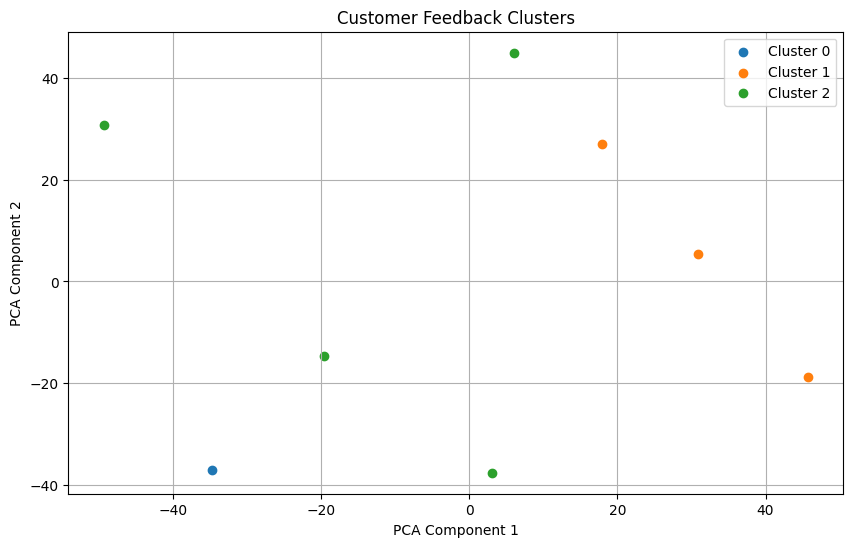

In [25]:
import cohere
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize Cohere client
co = cohere.Client('5M8usVXZX6YAMUv4NSdytwbPQo4dd8grk4P9gljm')  # Replace with your actual Cohere API key

# Sample customer feedback
feedbacks = [
    "I love the product! It's fantastic and easy to use.",
    "The shipping was delayed, and I'm really disappointed.",
    "Great support, but the app crashes often.",
    "I wish there were more payment options.",
    "The product quality is excellent, but it is a bit pricey.",
    "Customer service was very helpful and responsive.",
    "The app is user-friendly, but the layout could be improved.",
    "I experienced a lot of bugs during the installation."
]

# Generate embeddings for customer feedback
response = co.embed(texts=feedbacks)
embeddings = np.array(response.embeddings)

# Apply K-Means clustering
num_clusters = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(embeddings)

# Get the cluster labels
labels = kmeans.labels_

# Print feedbacks with their corresponding cluster labels
for feedback, label in zip(feedbacks, labels):
    print(f"Feedback: {feedback} | Cluster: {label}")

# Optional: Visualize the clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(reduced_embeddings[labels == i, 0], reduced_embeddings[labels == i, 1], label=f'Cluster {i}')

plt.title('Customer Feedback Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


In [23]:
embeddings

[[1.4238281,
  0.7402344,
  2.3847656,
  -2.2285156,
  -0.53759766,
  -0.1940918,
  -0.13061523,
  -0.56933594,
  0.13891602,
  -2.4140625,
  -0.7294922,
  0.42016602,
  -0.34350586,
  0.31030273,
  -0.083984375,
  -0.3857422,
  0.16235352,
  0.7426758,
  1.4755859,
  -1.6455078,
  1.3574219,
  3.1445312,
  0.13500977,
  -0.60058594,
  0.9165039,
  4.3554688,
  1.6582031,
  0.24084473,
  -0.31762695,
  -0.07324219,
  0.14782715,
  -2.7578125,
  2.4824219,
  0.37353516,
  0.10601807,
  0.11743164,
  1.609375,
  2.21875,
  1.1572266,
  0.3425293,
  -0.35839844,
  1.2021484,
  0.92089844,
  -0.68408203,
  -1.8818359,
  -0.88623047,
  -0.2277832,
  0.46240234,
  0.10253906,
  -0.090148926,
  0.37890625,
  0.083740234,
  1.2480469,
  -0.62060547,
  -0.6972656,
  -2.7167969,
  -2.5644531,
  1.6416016,
  -1.0253906,
  -0.33813477,
  0.61376953,
  -0.5629883,
  -1.7246094,
  -0.6640625,
  -0.5751953,
  -2.5644531,
  -0.41308594,
  -1.2705078,
  0.33325195,
  0.8183594,
  3.7734375,
  0.3623047

In [27]:
import cohere
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize Cohere client
co = cohere.Client('5M8usVXZX6YAMUv4NSdytwbPQo4dd8grk4P9gljm')  # Replace with your actual Cohere API key

# Sample user profile (preferences/interactions)
user_feedback = [
    "I love features that enhance productivity.",
    "I prefer dark mode in applications.",
    "I enjoy easy-to-use interfaces."
]

# Sample available features/content in the application
available_features = [
    "Introducing dark mode for a better experience.",
    "New productivity tools to help manage tasks efficiently.",
    "Improved user interface for a seamless experience.",
    "Real-time collaboration features for team projects.",
    "Notifications and reminders to keep you on track."
]

# Generate embeddings for user feedback
user_response = co.embed(texts=user_feedback)
user_embeddings = np.array(user_response.embeddings)

# Generate embeddings for available features
features_response = co.embed(texts=available_features)
feature_embeddings = np.array(features_response.embeddings)

# Calculate the average user profile embedding
average_user_embedding = np.mean(user_embeddings, axis=0).reshape(1, -1)

# Calculate cosine similarity between user profile and available features
similarities = cosine_similarity(average_user_embedding, feature_embeddings)

# Get the index of the most relevant feature
recommended_index = np.argmax(similarities)

# Print recommended feature
recommended_feature = available_features[recommended_index]
print(f"Recommended Feature for User: '{recommended_feature}'")


Recommended Feature for User: 'Improved user interface for a seamless experience.'
